In [0]:
import urllib.request
urllib.request.urlretrieve("https://www.gutenberg.org/files/1661/1661-0.txt" ,"/tmp/sherlock_holmes.txt")
dbutils.fs.mv("file:/tmp/sherlock_holmes.txt","dbfs:/data/sherlock_holmes.txt")

Out[1]: True

In [0]:
#creating spark context and reading the textfile
from pyspark import SparkContext , SparkConf
conf = SparkConf().setAppName("word count")
sc = SparkContext.getOrCreate(conf = conf)
bookrdd = sc.textFile("/data/sherlock_holmes.txt")

In [0]:
#converting all words to lower case
bookrdd = bookrdd.flatMap(lambda x : x.lower().split(" "))

In [0]:
#removing symbols, punctuation and blank spaces
import re
bookrdd = bookrdd.map(lambda x: re.sub(r'[^A-Za-z]', '', x))
bookedd = bookrdd.map(lambda x : x.strip())
bookrdd = bookrdd.filter(lambda x : len(x)!=0)

In [0]:
#removing stop words
from pyspark.ml.feature import StopWordsRemover
r =  StopWordsRemover()
stop_words_list = r.getStopWords()
bookrdd = bookrdd.filter(lambda x : x not in stop_words_list)

In [0]:
#finding number of words and sorting it
bookrdd = bookrdd.map(lambda x : (x,1))
bookrdd = bookrdd.reduceByKey(lambda x,y : x+y)
bookrddInverted = bookrdd.map(lambda x : (x[1],x[0]))
bookrddInverted = bookrddInverted.sortByKey(False)

Out[77]: [(486, 'said'),
 (466, 'upon'),
 (462, 'holmes'),
 (370, 'one'),
 (288, 'man'),
 (274, 'mr'),
 (269, 'little'),
 (231, 'see'),
 (213, 'may'),
 (190, 'us'),
 (186, 'well'),
 (174, 'think'),
 (171, 'must'),
 (171, 'shall'),
 (170, 'know'),
 (162, 'come'),
 (150, 'time'),
 (146, 'came'),
 (143, 'two'),
 (140, 'door'),
 (138, 'back'),
 (133, 'room'),
 (128, 'face'),
 (126, 'might'),
 (125, 'matter'),
 (124, 'yes'),
 (121, 'much'),
 (117, 'way'),
 (113, 'heard'),
 (112, 'house'),
 (112, 'hand'),
 (110, 'case'),
 (109, 'found'),
 (108, 'away'),
 (108, 'however'),
 (108, 'good'),
 (108, 'made'),
 (108, 'nothing'),
 (107, 'never'),
 (106, 'quite'),
 (101, 'sherlock'),
 (100, 'right'),
 (100, 'morning'),
 (98, 'tell'),
 (98, 'go'),
 (94, 'last'),
 (94, 'like'),
 (94, 'say'),
 (89, 'project'),
 (89, 'oh'),
 (89, 'saw'),
 (88, 'yet'),
 (88, 'long'),
 (88, 'asked'),
 (87, 'eyes'),
 (87, 'work'),
 (87, 'miss'),
 (86, 'took'),
 (86, 'first'),
 (85, 'day'),
 (84, 'left'),
 (82, 'st'),
 (82, 

In [0]:
book = bookrddInverted.take(10)
print(book)

[(486, 'said'), (466, 'upon'), (462, 'holmes'), (370, 'one'), (288, 'man'), (274, 'mr'), (269, 'little'), (231, 'see'), (213, 'may'), (190, 'us')]


/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[81]: Text(0.5, 1.0, 'Top Words in The Project Gutenberg eBook of The Adventures of Sherlock Holmes')

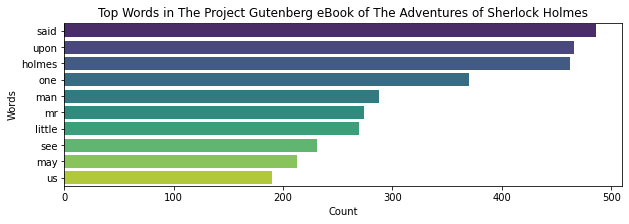

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

source = 'The Project Gutenberg eBook of The Adventures of Sherlock Holmes'
title = 'Top Words in ' + source
xlabel = 'Count'
ylabel = 'Words'

wordsdf = pd.DataFrame.from_records(book, columns =[xlabel, ylabel]) 
plt.figure(figsize=(10,3))
sns.barplot(xlabel, ylabel, data=wordsdf, palette="viridis").set_title(title)